# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [8]:
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df['flag_doente'].replace({0: 'saudavel', 1: 'doente'}, inplace=True)

In [9]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

tab_sex['media_doentes'] = tab_sex['doente'] / tab_sex['All']

tab_sex['odds_doentes'] = tab_sex['media_doentes'] / (1 - tab_sex['media_doentes'])

tab_sex['odds_ratio'] = tab_sex['odds_doentes'] / tab_sex.loc['All', 'odds_doentes']

tab_sex['logito_doentes'] = np.log(tab_sex['odds_doentes'])

tab_sex['woe'] = np.log(tab_sex['odds_ratio'])

tab_sex

flag_doente,doente,saudavel,All,media_doentes,odds_doentes,odds_ratio,logito_doentes,woe
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [19]:
# Certifique-se de que a coluna 'age' é numérica
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Remova valores NaN gerados na conversão
df = df.dropna(subset=['age'])

# Criação da tabela cruzada
tab_age = pd.crosstab(
    index=df['age'], 
    columns=df['flag_doente'], 
    margins=True, 
    margins_name='total'
)

# Renomear colunas
col_mapping = {value: name for value, name in zip(sorted(df['flag_doente'].unique()), ['healthy', 'sick'])}
tab_age = tab_age.rename(columns=col_mapping)

# Agrupamento por faixas etárias
tab_age = (tab_age.groupby(by=pd.qcut(x=df['age'], q=5), observed=False).agg(func='sum'))

# Adiciona linha de totais
tab_age = pd.concat(
    objs=[tab_age, pd.DataFrame(data=tab_age.sum(axis=0), columns=['total']).T]
)
tab_age.index.name = 'age'

# Cálculo das métricas
tab_age['mean_healthy'] = tab_age['healthy'] / tab_age['total']
tab_age['mean_sick'] = tab_age['sick'] / tab_age['total']

tab_age['odds'] = tab_age['sick'] / tab_age['healthy']
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['total', 'odds']

tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds'] / tab_age.loc['total', 'odds'])

# Cálculo da idade média
tab_age['mean_age'] = df.groupby(by=pd.qcut(x=df['age'], q=5), observed=False)['age'].mean()
tab_age.loc['total', 'mean_age'] = df['age'].mean()
tab_age['mean_age'] = round(tab_age['mean_age'])

tab_age

flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE,mean_age
age,,,,,,,,,,
"(28.999, 45.0]",22,41,63,0.349206,0.650794,1.863636,1.579545,0.622530,0.457137,41.0
"(45.0, 53.0]",40,26,66,0.606061,0.393939,0.650000,0.550915,-0.430783,-0.596175,50.0
"(53.0, 58.0]",43,35,78,0.551282,0.448718,0.813953,0.689875,-0.205852,-0.371245,56.0
"(58.0, 62.0]",22,37,59,0.372881,0.627119,1.681818,1.425443,0.519875,0.354483,60.0
"(62.0, 77.0]",12,25,37,0.324324,0.675676,2.083333,1.765752,0.733969,0.568577,67.0
total,139,164,303,0.458746,0.541254,1.179856,1.000000,0.165392,0.000000,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

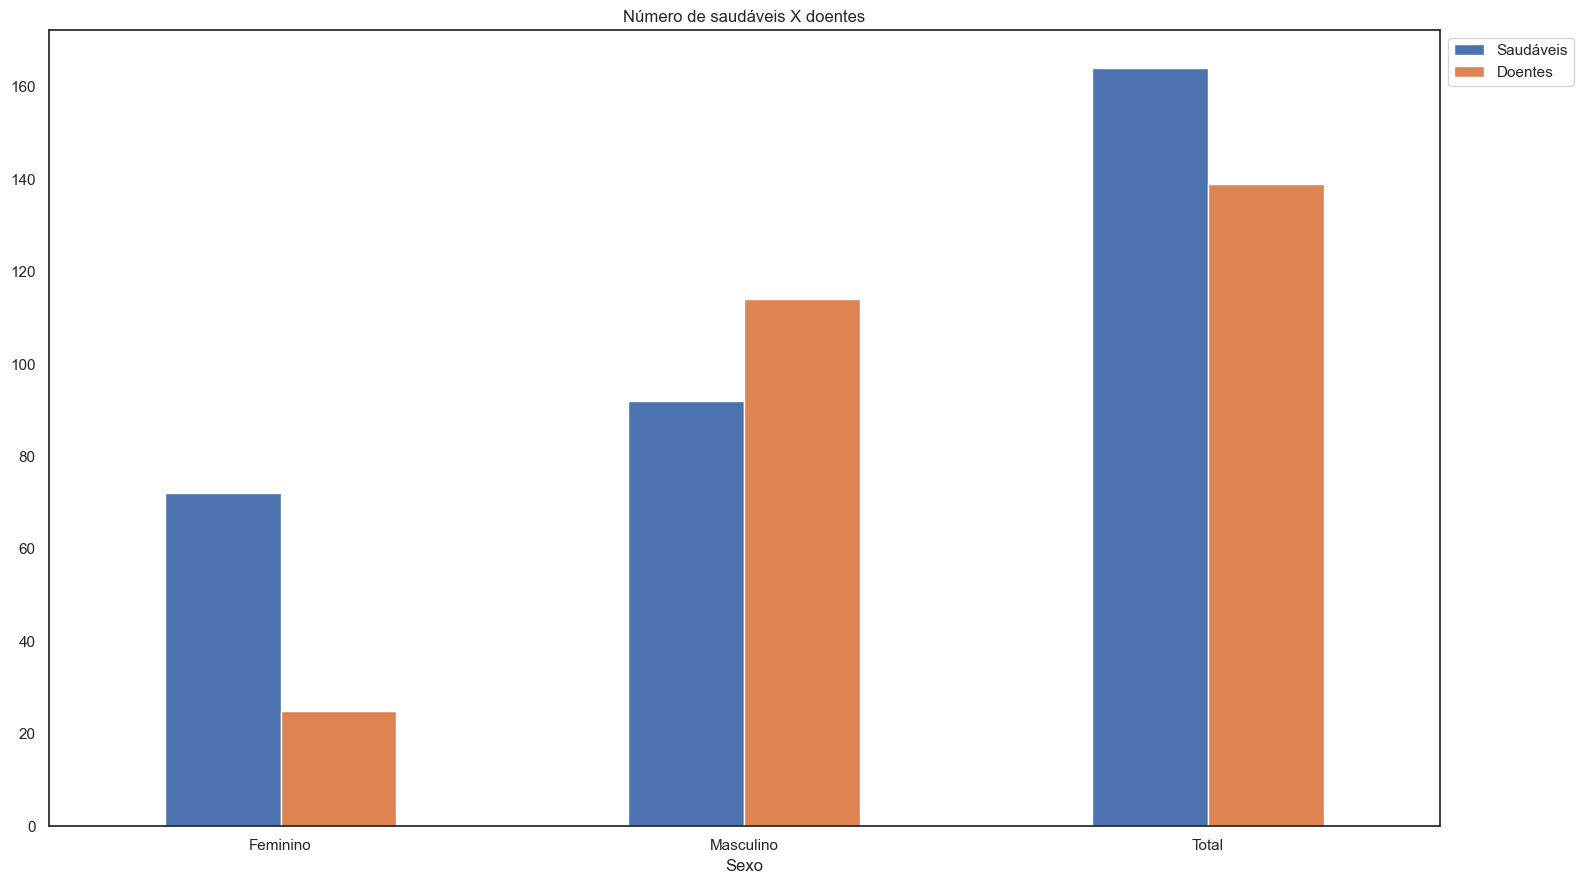

In [40]:
sns.set_theme(style="white")  # Definir o fundo branco

# Criação de um único eixo com subplots
fig, ax = plt.subplots(figsize=(16, 9))

# Plotando o gráfico diretamente no eixo `ax`
tab_sex[['saudavel', 'doente']].plot.bar(ax=ax)

# Ajuste do título e rótulos
ax.set_title(label='Número de saudáveis X doentes')
ax.set_xlabel(xlabel='Sexo')
ax.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)

# legenda
ax.legend(labels=['Saudáveis', 'Doentes'], loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar que a legenda ultrapasse o gráfico
plt.show()

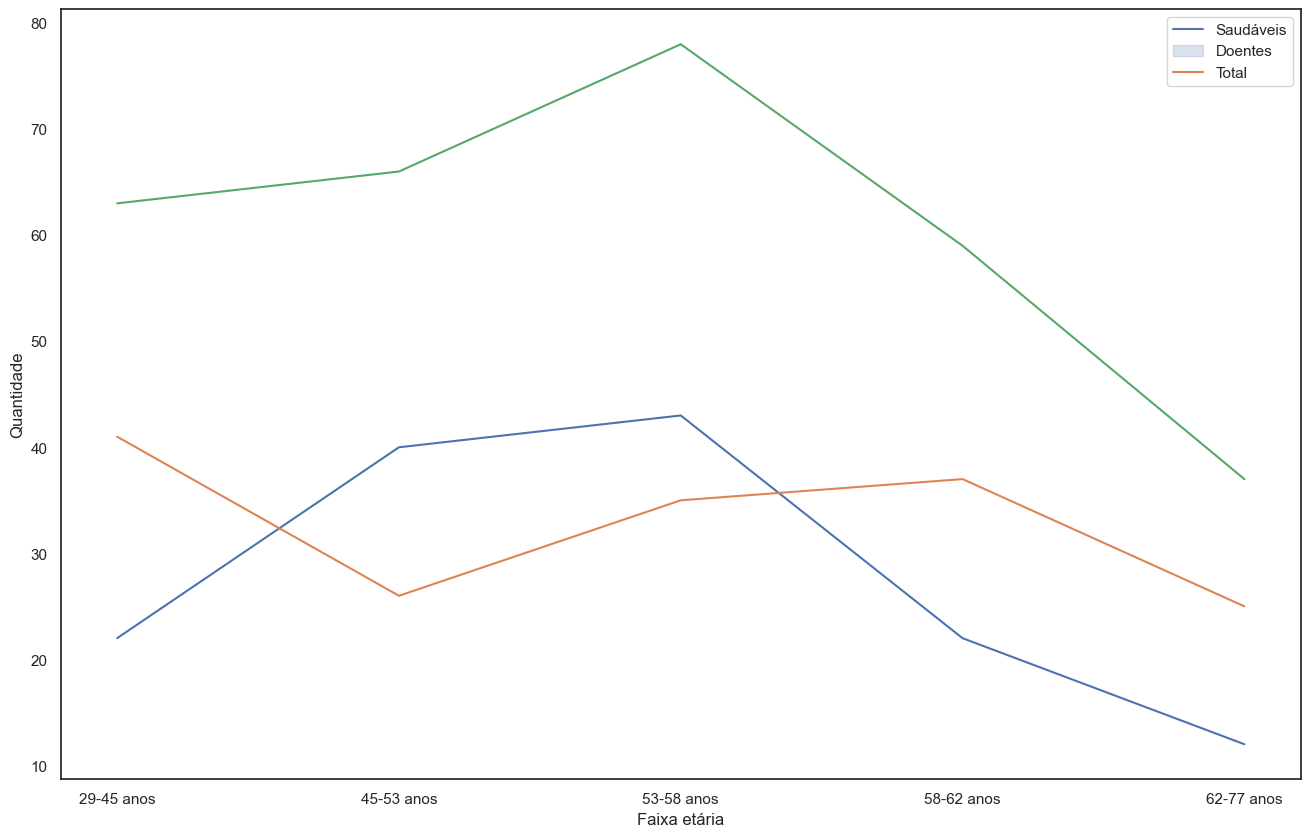

In [62]:
fig, ax = plt.subplots(figsize=(16, 10))  

# Definindo as faixas etárias para o eixo x
age_labels = ['29-45 anos', '45-53 anos', '53-58 anos', '58-62 anos', '62-77 anos']

# Usando sns.lineplot para plotar as linhas
for col in tab_age.iloc[:-1, :3]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str), 
                 y=tab_age.iloc[:-1][col], 
                 ax=ax)  # Usando o eixo único 'ax' em vez de 'axes[0]'

# legendas e rótulos
ax.legend(labels=['Saudáveis', 'Doentes', 'Total'])
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Quantidade')
ax.set_xticks(range(len(age_labels)))
ax.set_xticklabels(labels=age_labels)

plt.show()
